In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.metrics import mean_absolute_error, mean_squared_error
sns.set()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [57]:
data = pd.read_csv("data/home_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650.000,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242.000,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000.000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000.000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080.000,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [3]:
data.shape

(21613, 21)

In [4]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [58]:
data = data.drop(["id", "date"], axis=1)

In [7]:
data["price"].head()

0   221900.000
1   538000.000
2   180000.000
3   604000.000
4   510000.000
Name: price, dtype: float64

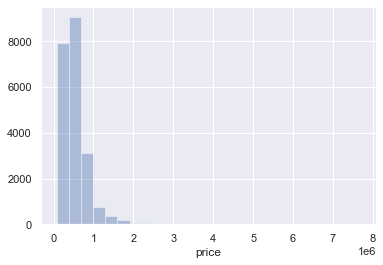

In [8]:
sns.distplot(data["price"], bins=25, kde=False)

In [9]:
data["price"].describe()

count     21613.000
mean     540088.142
std      367127.196
min       75000.000
25%      321950.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

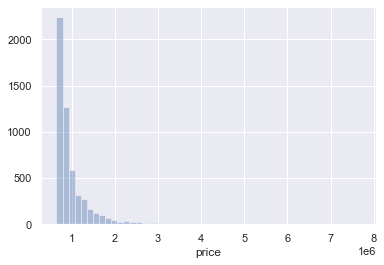

In [10]:
data_high = data[data["price"] > 645000]
sns.distplot(data_high["price"], kde=False)

In [11]:
data["price"].var()

134782378397.24687

In [65]:
data.var()

price           134782378397.247
bedrooms                   0.865
bathrooms                  0.593
sqft_living           843533.681
sqft_lot          1715658882.787
floors                     0.292
waterfront                 0.007
view                       0.587
condition                  0.423
grade                      1.382
sqft_above            685734.667
sqft_basement         195872.668
yr_built                 862.797
yr_renovated          161346.212
zipcode                 2862.788
lat                        0.019
long                       0.020
sqft_living15         469761.240
sqft_lot15         745518225.340
dtype: float64

In [67]:
data_with_logs = data
data_with_logs = data_with_logs.replace(to_replace=0, value=0.00001)
data_with_logs["sqft_living_log"] = np.log(data_with_logs["sqft_living"])
data_with_logs["sqft_lot_log"] = np.log(data_with_logs["sqft_lot"])
data_with_logs["sqft_above_log"] = np.log(data_with_logs["sqft_above"])
data_with_logs["sqft_basement_log"] = np.log(data_with_logs["sqft_basement"])
data_with_logs["sqft_living15_log"] = np.log(data_with_logs["sqft_living15"])
data_with_logs["sqft_lot15_log"] = np.log(data_with_logs["sqft_lot15"])

data_with_logs = data_with_logs.drop(["sqft_living", 
                                      "sqft_lot",
                                      "sqft_above", 
                                      "sqft_basement",
                                      "sqft_living15",
                                      "sqft_lot15"], axis=1)

In [13]:
d_cov = data.cov()

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scale = MinMaxScaler()

d_cov_scaled = scale.fit_transform(d_cov)

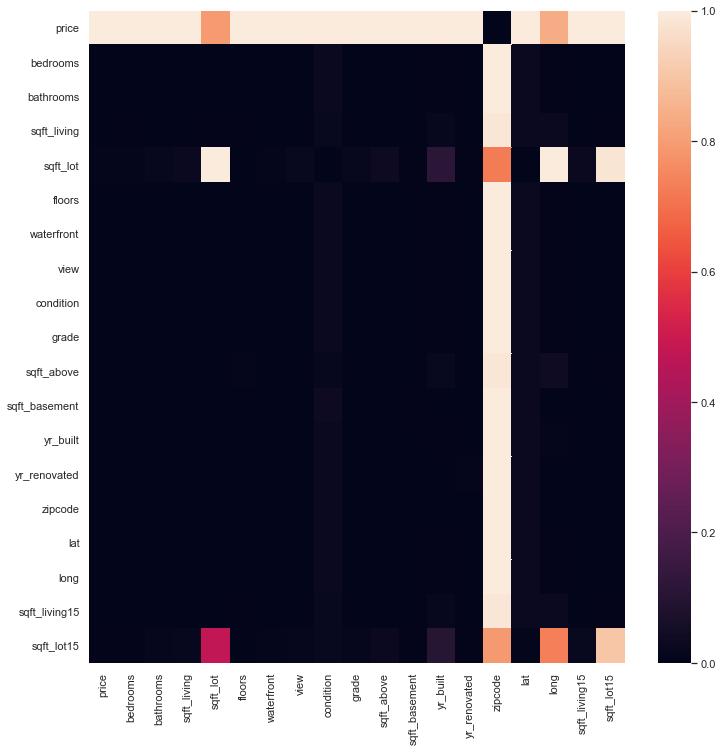

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(d_cov_scaled, 
            xticklabels=d_cov.columns, 
            yticklabels=d_cov.columns)

In [16]:
subset = data.drop(["price", "sqft_living15", "sqft_lot15", "yr_renovated", "floors", 
               "condition", "bedrooms", "sqft_basement", "bathrooms", "zipcode"], axis=1)
subset.head()

,sqft_living,sqft_lot,waterfront,view,grade,sqft_above,yr_built,lat,long
0,1180,5650.000,0,0,7,1180,1955,47.511,-122.257
1,2570,7242.000,0,0,7,2170,1951,47.721,-122.319
2,770,10000.000,0,0,6,770,1933,47.738,-122.233
3,1960,5000.000,0,0,7,1050,1965,47.521,-122.393
4,1680,8080.000,0,0,8,1680,1987,47.617,-122.045


In [17]:
subset.var()

sqft_living       843533.681
sqft_lot      1715658882.787
waterfront             0.007
view                   0.587
grade                  1.382
sqft_above        685734.667
yr_built             862.797
lat                    0.019
long                   0.020
dtype: float64

In [18]:
subset["sqft_lot_norm"] = np.log(subset["sqft_lot"])
subset["sqft_living_norm"] = np.log(subset["sqft_living"])
subset["sqft_above_norm"] = np.log(subset["sqft_above"])

In [19]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.000,3,1.000,1180,5650.000,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,538000.000,3,2.250,2570,7242.000,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,180000.000,2,1.000,770,10000.000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,604000.000,4,3.000,1960,5000.000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,510000.000,3,2.000,1680,8080.000,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [20]:
data["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [21]:
data["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [22]:
grade_dummies = pd.get_dummies(data["view"])
data_dum = pd.concat([data, grade_dummies], axis=1)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [74]:
#X = data_dum.drop(["price", "sqft_living15", "sqft_lot15", "view"], axis=1)
X = data.drop(["price"], axis=1)
#X = subset.drop(["sqft_living", "sqft_lot", "sqft_above"], axis=1)
y = data["price"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [70]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print(rfr.score(X_test, y_test))

0.8640301112827466


In [71]:

print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("Root mean squared error:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))

Mean squared error: 17378270712.60547
Root mean squared error: 131826.6692009074
Mean absolute error: 70277.25558085427


In [38]:
for f, d in sorted(zip(rfr.feature_importances_, X.columns), key=lambda k: k, reverse=True):
    print(d, f)

grade 0.3430445934566308
lat 0.29336955254301694
sqft_living 0.1805185290125788
long 0.045803970028195334
sqft_living15 0.02576798053003426
yr_built 0.020938338376595544
sqft_lot 0.016210907738875905
sqft_lot15 0.01465778956587487
sqft_above 0.0145706446824991
zipcode 0.010351445388639713
view 0.008943584312581045
waterfront 0.0061622067843718
bathrooms 0.0055450861737948425
condition 0.0048155961590747
sqft_basement 0.003418858106677115
bedrooms 0.0029126874378375845
floors 0.00154146311879456
yr_renovated 0.0014267665839270288


In [72]:
data_with_logs.var()

price               134782378397.247
bedrooms                       0.865
bathrooms                      0.593
floors                         0.292
waterfront                     0.007
view                           0.587
condition                      0.423
grade                          1.382
yr_built                     862.797
yr_renovated              161346.210
zipcode                     2862.788
lat                            0.019
long                           0.020
sqft_living_log                0.180
sqft_lot_log                   0.814
sqft_above_log                 0.183
sqft_basement_log             77.019
sqft_living15_log              0.107
sqft_lot15_log                 0.661
dtype: float64

In [190]:
data[data["sqft_living"] != data["sqft_living15"]]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.000,3,1.000,1180,5650.000,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,538000.000,3,2.250,2570,7242.000,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,180000.000,2,1.000,770,10000.000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,604000.000,4,3.000,1960,5000.000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,510000.000,3,2.000,1680,8080.000,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,429000.000,3,2.000,1490,1126.000,3.000,0,0,3,8,1490,0,2014,0,98144,47.570,-122.288,1400,1230
21606,1007500.000,4,3.500,3510,7200.000,2.000,0,0,3,9,2600,910,2009,0,98136,47.554,-122.398,2050,6200
21607,475000.000,3,2.500,1310,1294.000,2.000,0,0,3,8,1180,130,2008,0,98116,47.577,-122.409,1330,1265
21609,400000.000,4,2.500,2310,5813.000,2.000,0,0,3,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200


In [210]:
sqfts = [i for i in data.columns if i.startswith("sqft")]

In [212]:
data[sqfts].head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,1180,5650.000,1180,0,1340,5650
1,2570,7242.000,2170,400,1690,7639
2,770,10000.000,770,0,2720,8062
3,1960,5000.000,1050,910,1360,5000
4,1680,8080.000,1680,0,1800,7503


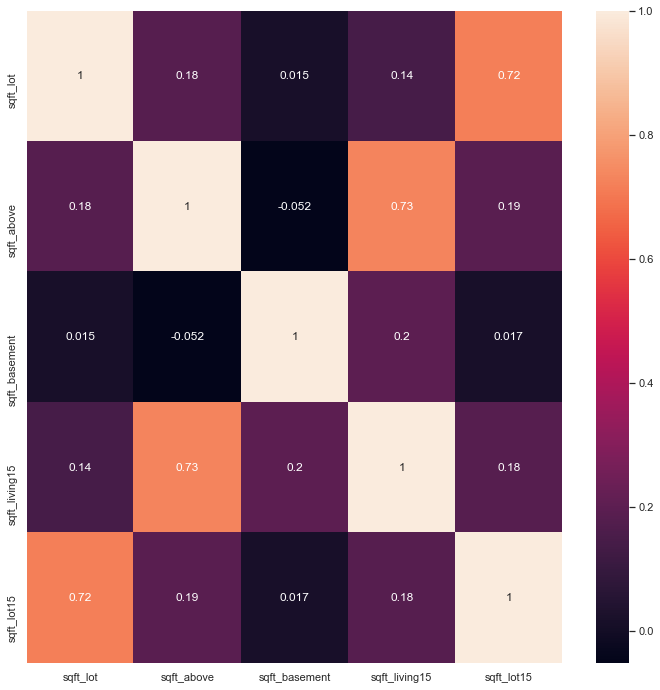

In [218]:
plt.figure(figsize=(12,12))
sns.heatmap(data[["sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]].corr(), annot=True)

In [215]:
data[sqfts].corr()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
sqft_living,1.000,0.173,0.877,0.435,0.756,0.183
sqft_lot,0.173,1.000,0.184,0.015,0.145,0.719
sqft_above,0.877,0.184,1.000,-0.052,0.732,0.194
sqft_basement,0.435,0.015,-0.052,1.000,0.200,0.017
sqft_living15,0.756,0.145,0.732,0.200,1.000,0.183
sqft_lot15,0.183,0.719,0.194,0.017,0.183,1.000


In [236]:
X_test.iloc[0, :]

bedrooms            3.000
bathrooms           1.500
sqft_lot         8800.000
floors              1.000
waterfront          0.000
view                0.000
condition           4.000
grade               7.000
sqft_above       1410.000
sqft_basement       0.000
yr_built         1965.000
yr_renovated        0.000
zipcode         98092.000
lat                47.293
long             -122.183
sqft_lot15      10108.000
Name: 2326, dtype: float64

In [45]:
y_test.head()

20798    643950.000
9379     430000.000
14119    420000.000
3490    1078000.000
3533     310000.000
Name: price, dtype: float64

In [47]:
np.exp(rfr.predict(X_test.iloc[0, :].values.reshape(1, -1)))

array([585804.21451838])

In [49]:
np.exp(rfr.predict(X_test.iloc[1, :].values.reshape(1, -1)))

array([443714.19155033])

In [50]:
y_test.values

array([643950., 430000., 420000., ..., 270000., 218000., 325000.])

In [51]:
vals = pd.DataFrame({"actual": y_test.values, "predicted": np.exp(y_pred)}).sort_values("actual")

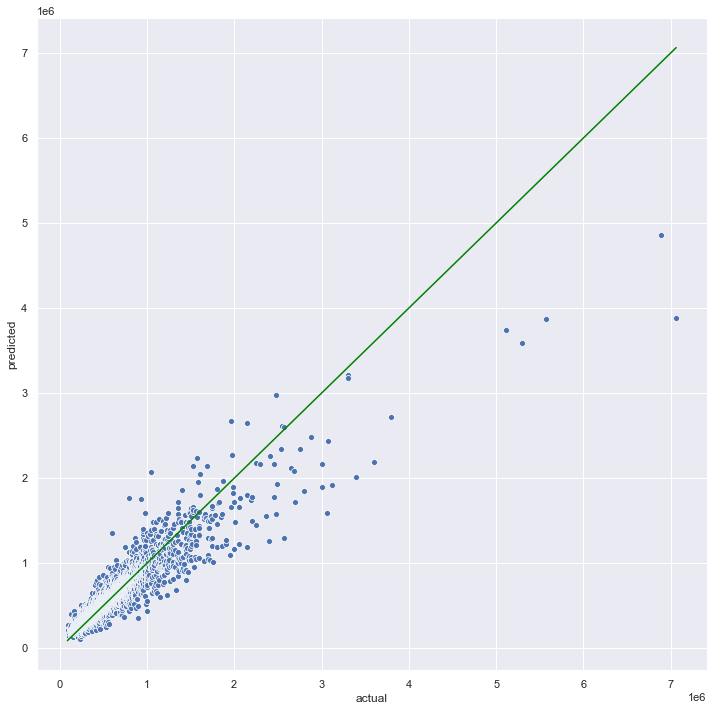

In [52]:
#residual plot
plt.figure(figsize=(12,12))
sns.lineplot(x="actual", y="actual", data=vals, color="green")
sns.scatterplot(x="actual", y="predicted", data=vals)


In [53]:
vals.head(10)

,actual,predicted
974,89000.000,150872.513
268,90000.000,269091.814
3393,90000.000,155388.739
1997,95000.000,147235.899
4566,100000.000,193176.076
3366,100000.000,212664.713
1698,105000.000,145368.164
3018,110000.000,142679.737
1417,111300.000,173902.076
4696,115000.000,214747.986
